<a href="https://colab.research.google.com/github/HaseebHussainMd/Projects/blob/main/Aerofit_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***About Aerofit***
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

# ***Problem Statement :***
To analyze customer characteristics and preferences to provide actionable insights for better product recommendations and marketing strategies. By understanding the factors influencing customer choices, AeroFit can tailor its marketing efforts, product features, and pricing strategies to meet the diverse needs of its customer base and enhance overall business performance.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 24.2MB/s]


In [ ]:
df=pd.read_csv('aerofit_treadmill.csv')

# ***Basic Metric Analysis***

In [ ]:
df.shape #Number of rows and columns in the dataset

(180, 9)

In [ ]:
df.info() #Column names and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isna().sum() #Number of missing values in each column

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# **OUTLIERS**

In [ ]:
outliers_info = df.describe().loc[['mean', '50%']].T
outliers_info['difference'] = outliers_info['mean'] - outliers_info['50%']
outliers_info.sort_values(by='difference', ascending=False, inplace=True)
outliers_info

,mean,50%,difference
Income,53719.577778,50596.5,3123.077778
Miles,103.194444,94.0,9.194444
Age,28.788889,26.0,2.788889
Usage,3.455556,3.0,0.455556
Fitness,3.311111,3.0,0.311111
Education,15.572222,16.0,-0.427778


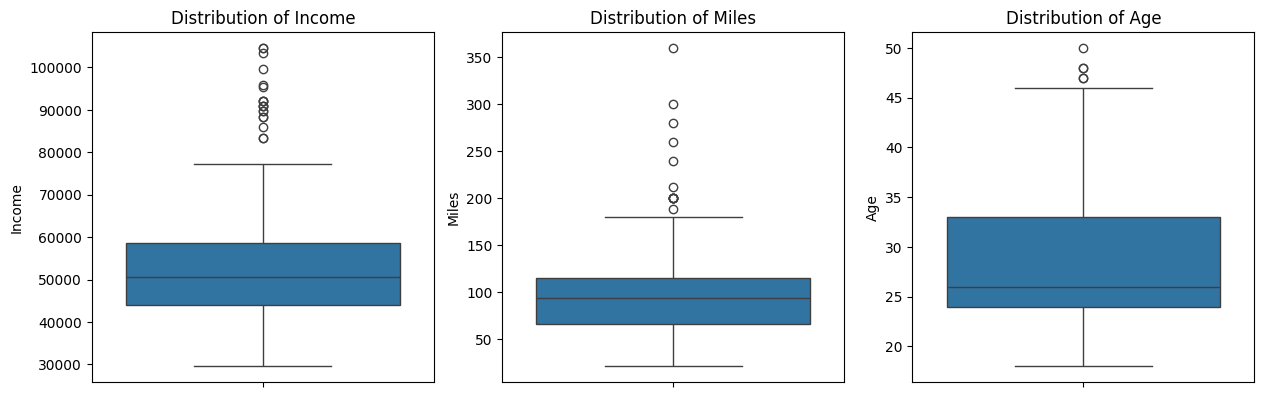

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(data=df['Income'])
plt.title('Distribution of Income')

plt.subplot(2, 3, 2)
sns.boxplot(data=df['Miles'])
plt.title('Distribution of Miles')

plt.subplot(2, 3, 3)
sns.boxplot(data=df['Age'])
plt.title('Distribution of Age')

plt.show()

# **Clipping the Income Field**

In [ ]:
# 5th and 95th percentiles for the dataset
percentile_5 = np.percentile(df['Income'], 5)
percentile_95 = np.percentile(df['Income'], 95)

# Clipping the data between the 5th and 95th percentiles
clipped_data = np.clip(df['Income'], percentile_5, percentile_95)

# Replacing the original 'Age' attribute with the clipped data
df['Income'] = clipped_data

# **Clipping the Miles Field**

In [ ]:
# 5th and 95th percentiles for the dataset
percentile_5 = np.percentile(df['Miles'], 5)
percentile_95 = np.percentile(df['Miles'], 95)

# Clipping the data between the 5th and 95th percentiles
clipped_data = np.clip(df['Miles'], percentile_5, percentile_95)

# Replacing the original 'Age' attribute with the clipped data
df['Miles'] = clipped_data

# **Clipping the Age Field**

In [ ]:
# 5th and 95th percentiles for the dataset
percentile_5 = np.percentile(df['Age'], 5)
percentile_95 = np.percentile(df['Age'], 95)

# Clipping the data between the 5th and 95th percentiles
clipped_data = np.clip(df['Age'], percentile_5, percentile_95)

# Replacing the original 'Age' attribute with the clipped data
df['Age'] = clipped_data

# **Customer Profiling - Categorization of users**

# **Age Category**

In [ ]:
def age_cat(x):
  if x>=18 and x<=30:
    return 'Young Adult'
  elif x>=31 and x<=50:
    return 'Middle-aged Adult'
  elif x>50:
    return 'Older Adult'



In [ ]:
df['Age_Category'] = df['Age'].apply(lambda x: age_cat(x))

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Category
0,KP281,20.0,Male,14,Single,3,4,34053.15,112,Young Adult
1,KP281,20.0,Male,15,Single,2,3,34053.15,75,Young Adult
2,KP281,20.0,Female,14,Partnered,4,3,34053.15,66,Young Adult
3,KP281,20.0,Male,12,Single,3,3,34053.15,85,Young Adult
4,KP281,20.0,Male,13,Partnered,4,2,35247.00,47,Young Adult


# **Income Category**

In [ ]:
def income_cat(x):
  if x<30000:
    return 'Low Income'
  elif x>30000 and x<=60000:
    return 'Middle Income'
  elif x>60000:
    return 'High Income'



In [ ]:
df['Income_Category'] = df['Income'].apply(lambda x: income_cat(x))

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Category,Income_Category
0,KP281,20.0,Male,14,Single,3,4,34053.15,112,Young Adult,Middle Income
1,KP281,20.0,Male,15,Single,2,3,34053.15,75,Young Adult,Middle Income
2,KP281,20.0,Female,14,Partnered,4,3,34053.15,66,Young Adult,Middle Income
3,KP281,20.0,Male,12,Single,3,3,34053.15,85,Young Adult,Middle Income
4,KP281,20.0,Male,13,Partnered,4,2,35247.00,47,Young Adult,Middle Income


# **Fitness Category**

In [ ]:
def fit_cat(x):
  if x>=1 and x<=2:
    return 'Poor'
  elif x==3:
    return 'Fair'
  elif x==4:
    return 'Good'
  elif x==5:
    return 'Excellent'


In [ ]:
df['Fitness_Category'] = df['Fitness'].apply(lambda x: fit_cat(x))

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Category,Income_Category,Fitness_Category
0,KP281,20.0,Male,14,Single,3,4,34053.15,112,Young Adult,Middle Income,Good
1,KP281,20.0,Male,15,Single,2,3,34053.15,75,Young Adult,Middle Income,Fair
2,KP281,20.0,Female,14,Partnered,4,3,34053.15,66,Young Adult,Middle Income,Fair
3,KP281,20.0,Male,12,Single,3,3,34053.15,85,Young Adult,Middle Income,Fair
4,KP281,20.0,Male,13,Partnered,4,2,35247.00,47,Young Adult,Middle Income,Poor


# **Usage Categories**

In [ ]:
def usage_cat(x):
  if x>=1 and x<=2:
    return 'Low Usage'
  elif x>=3 and x<=4:
    return 'Moderate Usage'
  elif x>=5:
    return 'High Usage'



In [ ]:
df['Usage_Category'] = df['Usage'].apply(lambda x: usage_cat(x))

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Category,Income_Category,Fitness_Category,Usage_Category
0,KP281,20.0,Male,14,Single,3,4,34053.15,112,Young Adult,Middle Income,Good,Moderate Usage
1,KP281,20.0,Male,15,Single,2,3,34053.15,75,Young Adult,Middle Income,Fair,Low Usage
2,KP281,20.0,Female,14,Partnered,4,3,34053.15,66,Young Adult,Middle Income,Fair,Moderate Usage
3,KP281,20.0,Male,12,Single,3,3,34053.15,85,Young Adult,Middle Income,Fair,Moderate Usage
4,KP281,20.0,Male,13,Partnered,4,2,35247.00,47,Young Adult,Middle Income,Poor,Moderate Usage


# **Education Category**

In [ ]:
def edu_cat(x):
  if x<12:
    return 'Not Graduated'
  elif x>=12 and x<=16:
    return 'Educated'
  elif x>16:
    return 'Highly Educated'



In [ ]:
df['Education_Category'] = df['Education'].apply(lambda x: edu_cat(x))

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Category,Income_Category,Fitness_Category,Usage_Category,Education_Category
0,KP281,20.0,Male,14,Single,3,4,34053.15,112,Young Adult,Middle Income,Good,Moderate Usage,Educated
1,KP281,20.0,Male,15,Single,2,3,34053.15,75,Young Adult,Middle Income,Fair,Low Usage,Educated
2,KP281,20.0,Female,14,Partnered,4,3,34053.15,66,Young Adult,Middle Income,Fair,Moderate Usage,Educated
3,KP281,20.0,Male,12,Single,3,3,34053.15,85,Young Adult,Middle Income,Fair,Moderate Usage,Educated
4,KP281,20.0,Male,13,Partnered,4,2,35247.00,47,Young Adult,Middle Income,Poor,Moderate Usage,Educated


## **Visual Analysis**

Text(0.5, 1.0, 'Age Distribution of Customers')

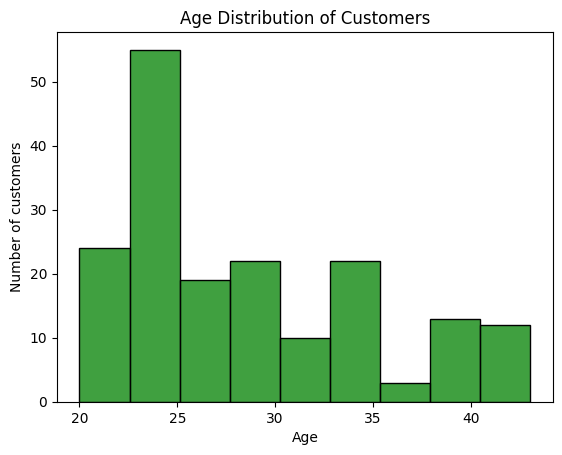

In [ ]:
sns.histplot(data = df['Age'],color = 'g')
plt.ylabel('Number of customers')
plt.title('Age Distribution of Customers')

Text(0, 0.5, 'Number of customers')

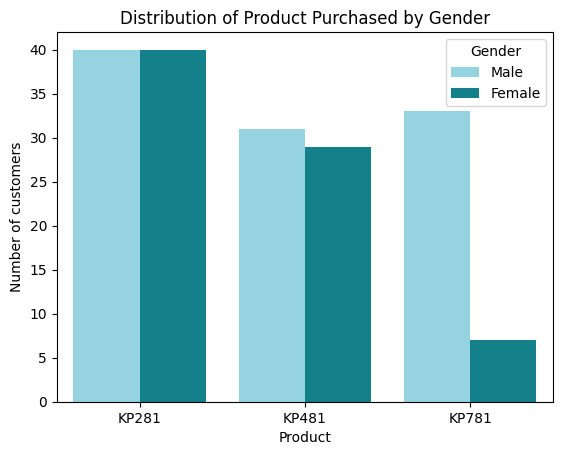

In [ ]:
hue_colors = {"Male": "#89dbec", "Female": "#00909e"}
sns.countplot(data=df,x = df['Product'],hue='Gender',palette=hue_colors)
plt.title('Distribution of Product Purchased by Gender')
plt.ylabel('Number of customers')

Text(0, 0.5, 'Number of customers')

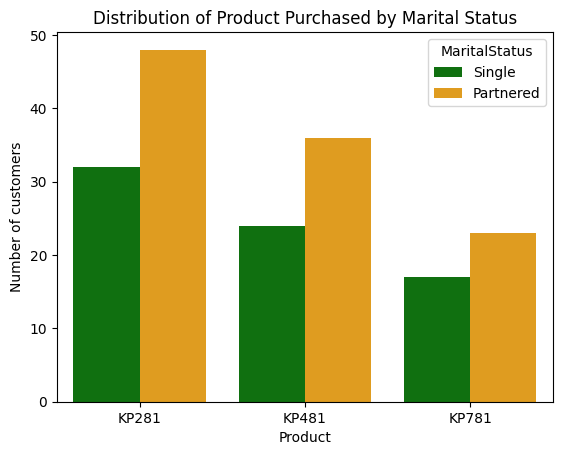

In [ ]:
hue_colors = {"Single": "green", "Partnered": "orange"}
sns.countplot(data=df,x = df['Product'],hue='MaritalStatus',palette = hue_colors)
plt.title('Distribution of Product Purchased by Marital Status')
plt.ylabel('Number of customers')

Text(0.5, 1.0, 'Distribution of Age for Each Product Purchased')

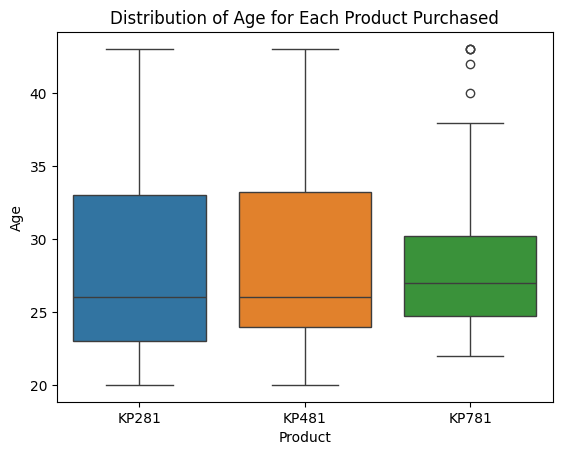

In [ ]:
sns.boxplot(data=df,x=df['Product'], y=df['Age'],hue='Product')
plt.title('Distribution of Age for Each Product Purchased')

Text(0.5, 1.0, 'Distribution of Age for Each Product Purchased')

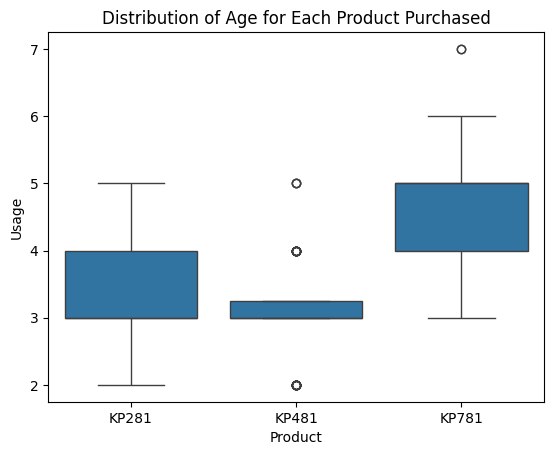

In [ ]:
sns.boxplot(data=df,x=df['Product'], y=df['Usage'])
plt.title('Distribution of Age for Each Product Purchased')

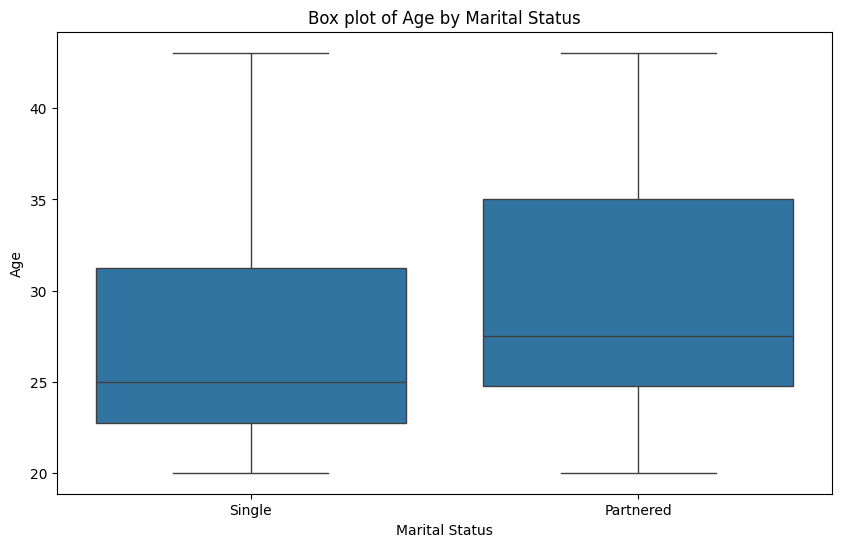

In [ ]:
product_data = df[df['Product'] == 'KP281']

# Box plot for Marital Status vs. Product Purchased
plt.figure(figsize=(10, 6))
sns.boxplot(data=product_data, x='MaritalStatus', y='Age')
plt.title('Box plot of Age by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.show()

Text(0.5, 1.0, 'Distribution of Age for Each Product Purchased by Marital Status')

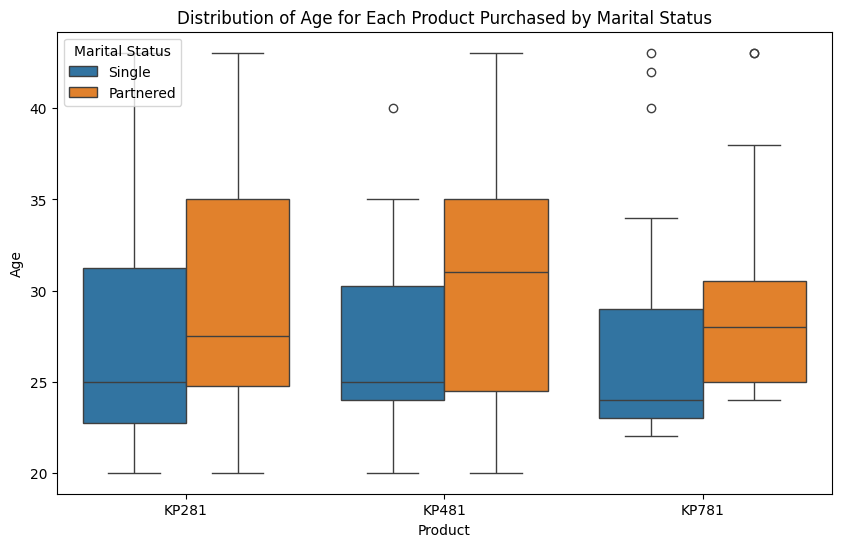

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product', y='Age', hue='MaritalStatus')
plt.legend(loc='upper left',title='Marital Status')
plt.title('Distribution of Age for Each Product Purchased by Marital Status')

In [ ]:
cat = df['Fitness_Category'].value_counts()

<ipython-input-102-ff8a4682fe61>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat.values, y=cat.index,orient='h', palette=colors,errorbar=None)


Text(0.5, 1.0, 'Distribution of Customers by their Fitness')

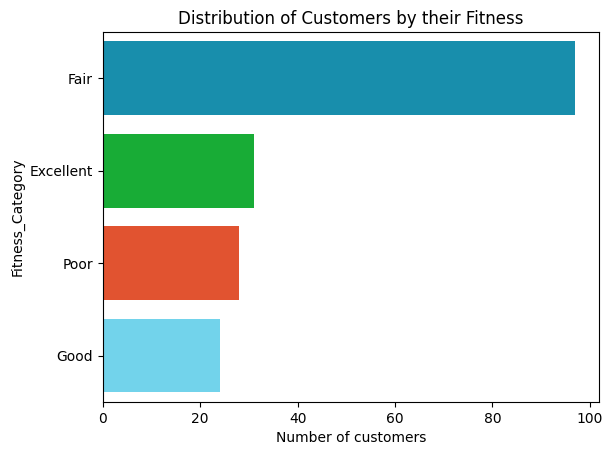

In [ ]:
colors = {"Excellent": "#00c427", "Fair": "#009dc4","Good":"#5edfff","Poor":"#ff4112"}
sns.barplot(x=cat.values, y=cat.index,orient='h', palette=colors,errorbar=None)
plt.xlabel('Number of customers')
plt.title('Distribution of Customers by their Fitness')

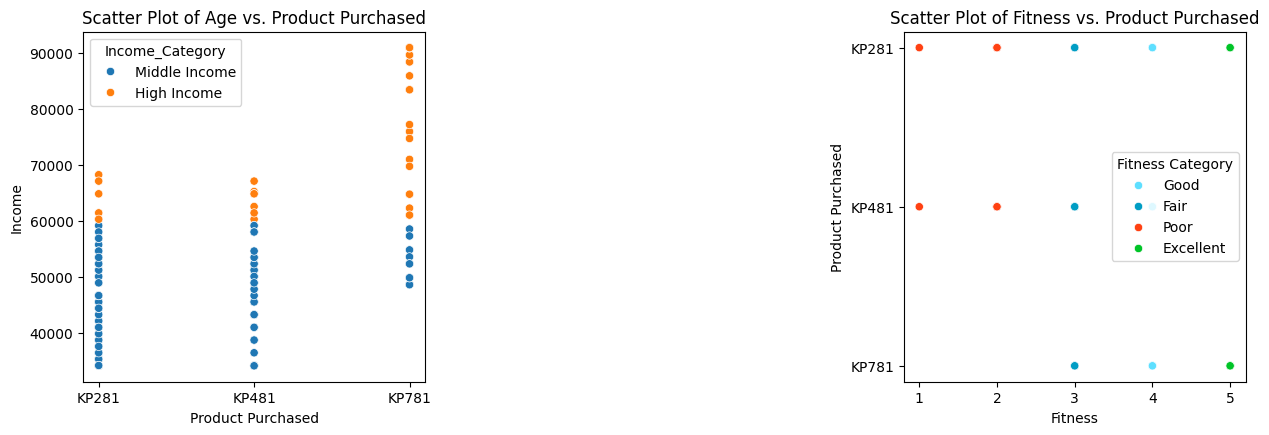

In [ ]:

plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
sns.scatterplot(data=df, x='Product', y='Income',hue='Income_Category' )
plt.title('Scatter Plot of Age vs. Product Purchased')
plt.xlabel('Product Purchased')
plt.ylabel('Income')

plt.subplot(2,3,3)
colors = {"Excellent": "#00c427", "Fair": "#009dc4","Good":"#5edfff","Poor":"#ff4112"}
sns.scatterplot(data=df, x='Fitness', y='Product',hue='Fitness_Category', palette=colors )
plt.legend(loc='center right',title='Fitness Category')
plt.title('Scatter Plot of Fitness vs. Product Purchased')
plt.xlabel('Fitness')
plt.ylabel('Product Purchased')
plt.show()

<Axes: xlabel='Age', ylabel='Income'>

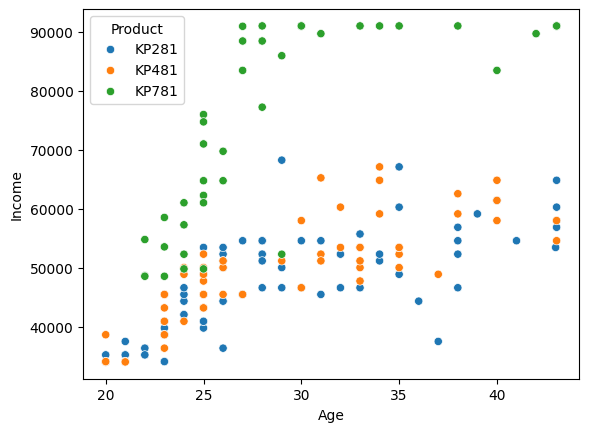

In [ ]:
sns.scatterplot(data=df, x='Age', y='Income',hue='Product' )

# **Marginal Probability**

In [ ]:
marginal_prob = pd.crosstab(index=df['Product'], columns='Count', normalize=True,colnames=' ') * 100
marginal_prob.rename(columns={'Count': 'Percentage'}, inplace=True)
marginal_prob

,Percentage
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


# **Conditional Probability**

In [ ]:
# The probability of customer buying a KP781 treadmill based on Gender
prob_KP781_and_male = len(df[(df['Product'] == 'KP781') & (df['Gender'] == 'Male')]) / len(df[df['Gender'] == 'Male'])
prob_KP781_and_Female = len(df[(df['Product'] == 'KP781') & (df['Gender'] == 'Female')]) / len(df[df['Gender'] == 'Female'])

print("The probability of customer buying a KP781 treadmill based on Gender")
print("Probability of a male customer buying a KP781 treadmill:", round(prob_KP781_and_male,2))
print("Probability of a Female customer buying a KP781 treadmill:", round(prob_KP781_and_Female,2))

The probability of customer buying a KP781 treadmill based on Gender
Probability of a male customer buying a KP781 treadmill: 0.32
Probability of a Female customer buying a KP781 treadmill: 0.09


In [ ]:
#probability of a customer purchasing a KP481 treadmill belonging to Middle-aged Adult age group
prob_KP481_and_Middleage = len(df[(df['Product'] == 'KP481') & (df['Age_Category'] == 'Middle-aged Adult')]) / len(df[df['Age_Category'] == 'Middle-aged Adult'])
print("probability of a customer purchasing a KP481 treadmill belonging to Middle-aged Adult age group:", round(prob_KP481_and_Middleage,2))

probability of a customer purchasing a KP481 treadmill belonging to Middle-aged Adult age group: 0.42


In [ ]:
categorical_vars = ['Gender', 'Education_Category', 'MaritalStatus','Income_Category']
# Calculating conditional probabilities for each categorical variable
for i in categorical_vars:
    category_table = pd.crosstab(index=df['Product'], columns=df[i])
    conditional_probability = category_table/category_table.sum(axis=0)
    print(f"Conditional Probability of Product Purchased given {i}:")
    print(conditional_probability)
    print()

Conditional Probability of Product Purchased given Gender:
Gender     Female      Male
Product                    
KP281    0.526316  0.384615
KP481    0.381579  0.298077
KP781    0.092105  0.317308

Conditional Probability of Product Purchased given Education_Category:
Education_Category  Educated  Highly Educated
Product                                      
KP281               0.509804         0.074074
KP481               0.379085         0.074074
KP781               0.111111         0.851852

Conditional Probability of Product Purchased given MaritalStatus:
MaritalStatus  Partnered    Single
Product                           
KP281           0.448598  0.438356
KP481           0.336449  0.328767
KP781           0.214953  0.232877

Conditional Probability of Product Purchased given Income_Category:
Income_Category  High Income  Middle Income
Product                                    
KP281               0.142857       0.536232
KP481               0.166667       0.384058
KP781       

# **Correlation**

In [ ]:
df.corr(numeric_only =True)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.279533,0.018020,0.059047,0.514362,0.029636
Education,0.279533,1.000000,0.395155,0.410581,0.628908,0.367262
Usage,0.018020,0.395155,1.000000,0.668606,0.527707,0.786269
Fitness,0.059047,0.410581,0.668606,1.000000,0.535945,0.822393
Income,0.514362,0.628908,0.527707,0.535945,1.000000,0.537297
Miles,0.029636,0.367262,0.786269,0.822393,0.537297,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

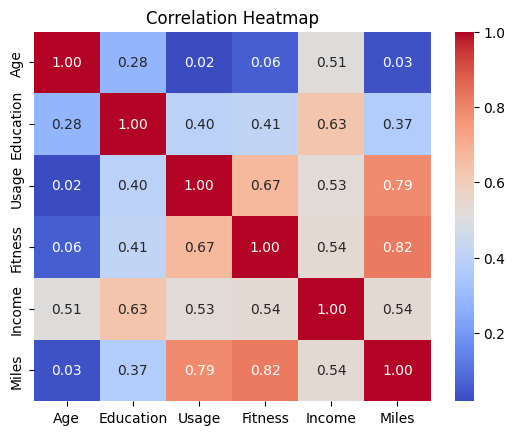

In [ ]:
sns.heatmap(df.corr(numeric_only =True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Distribution of Customers by their Fitness')

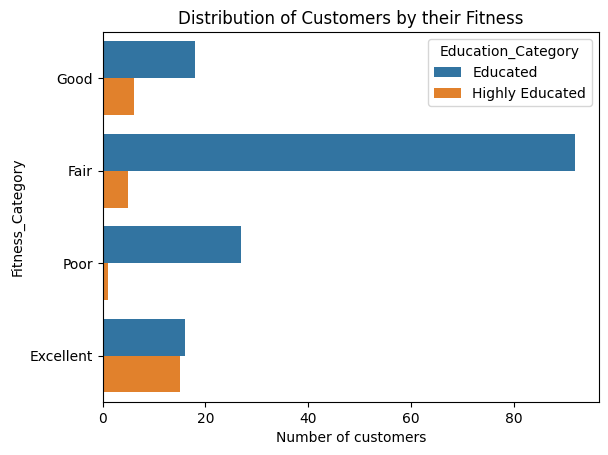

In [ ]:
#colors = {"Excellent": "#00c427", "Fair": "#009dc4","Good":"#5edfff","Poor":"#ff4112"}
sns.countplot(data=df,y='Fitness_Category',hue='Education_Category',)
plt.xlabel('Number of customers')
plt.title('Distribution of Customers by their Fitness')